In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv,sqlite3
con=sqlite3.connect('socioeconomic.db')
cur=con.cursor()
%reload_ext sql

In [5]:
%sql sqlite:///socioeconomic.db

'Connected: @socioeconomic.db'

In [6]:
df=pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data",con,if_exists='replace',index=False,method="multi")

78

In [7]:
import prettytable
prettytable.DEFAULT="DEFAULT"

In [17]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [19]:
df1=pd.read_sql("SELECT * FROM chicago_socioeconomic_data",con)
df1

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [20]:
df1.describe()

,ca,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
count,77.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,77.000000
mean,39.000000,4.920513,21.739744,15.341026,20.330769,35.717949,25597.000000,49.506494
std,22.371857,3.658981,11.457231,7.499497,11.746514,7.284421,15196.405541,28.690556
min,1.000000,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,1.000000
25%,20.000000,2.325000,13.350000,9.200000,12.075000,32.150000,15804.750000,25.000000
50%,39.000000,3.850000,19.050000,13.850000,18.650000,38.050000,21668.500000,50.000000
75%,58.000000,6.800000,29.150000,20.000000,26.600000,40.500000,28715.750000,74.000000
max,77.000000,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,98.000000


In [21]:
df1['hardship_index'].max()

98.0

In [22]:
df1['hardship_index'].idxmax()

53

In [23]:
df1.at[53,'community_area_name']

'Riverdale'

In [24]:
df1[df1['per_capita_income_']>60000]

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
31,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0


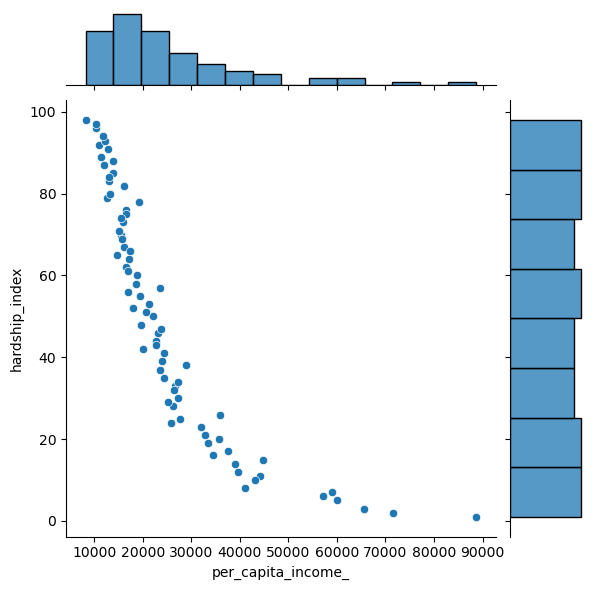

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plot=sns.jointplot(x='per_capita_income_',y='hardship_index',data=df1)

In [26]:
%sql SELECT * FROM chicago_socioeconomic_data LIMIT 10;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


In [27]:
%sql select count(*) from chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


count(*)
78


In [28]:
%sql select count(ca) from chicago_socioeconomic_data where hardship_index>50.0

 * sqlite:///socioeconomic.db
Done.


count(ca)
38


In [29]:
%sql select max(hardship_index) from chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


max(hardship_index)
98.0


In [32]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index=98.0;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [8]:
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_>60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


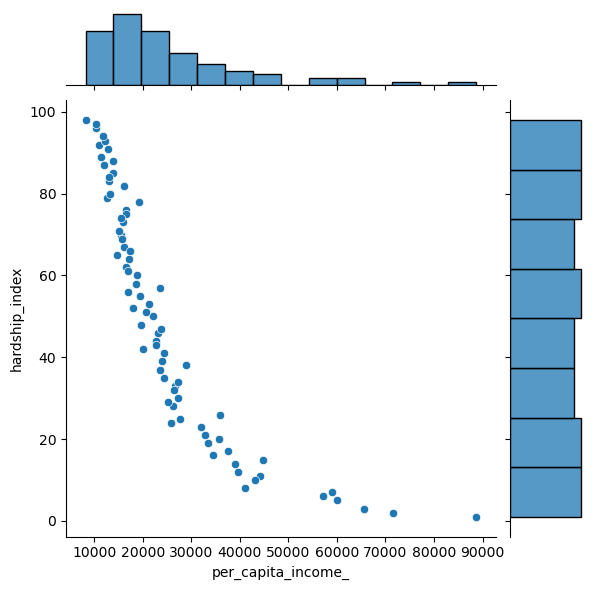

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plot=sns.jointplot(x='per_capita_income_',y='hardship_index',data=df1)


In [9]:
%sql select name from sqlite_master where type="table";

 * sqlite:///socioeconomic.db
Done.


name
chicago_socioeconomic_data


In [11]:
%sql PRAGMA table_info([chicago_socioeconomic_data])

 * sqlite:///socioeconomic.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ca,REAL,0,None,0
1,community_area_name,TEXT,0,None,0
2,percent_of_housing_crowded,REAL,0,None,0
3,percent_households_below_poverty,REAL,0,None,0
4,percent_aged_16_unemployed,REAL,0,None,0
5,percent_aged_25_without_high_school_diploma,REAL,0,None,0
6,percent_aged_under_18_or_over_64,REAL,0,None,0
7,per_capita_income_,INTEGER,0,None,0
8,hardship_index,REAL,0,None,0


In [14]:
%%sql 
 PRAGMA table_info([chicago_socioeconomic_data])

 * sqlite:///socioeconomic.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ca,REAL,0,None,0
1,community_area_name,TEXT,0,None,0
2,percent_of_housing_crowded,REAL,0,None,0
3,percent_households_below_poverty,REAL,0,None,0
4,percent_aged_16_unemployed,REAL,0,None,0
5,percent_aged_25_without_high_school_diploma,REAL,0,None,0
6,percent_aged_under_18_or_over_64,REAL,0,None,0
7,per_capita_income_,INTEGER,0,None,0
8,hardship_index,REAL,0,None,0


In [15]:
%%sql
PRAGMA table_info([chicago_school_progress])

 * sqlite:///socioeconomic.db
Done.


cid,name,type,notnull,dflt_value,pk
0,School_ID,INTEGER,0,None,0
1,NAME_OF_SCHOOL,TEXT,0,None,0
2,"Elementary, Middle, or High School",TEXT,0,None,0
3,Street_Address,TEXT,0,None,0
4,City,TEXT,0,None,0
5,State,TEXT,0,None,0
6,ZIP_Code,INTEGER,0,None,0
7,Phone_Number,TEXT,0,None,0
8,Link,TEXT,0,None,0
9,Network_Manager,TEXT,0,None,0
